# Imports

In [0]:
import pandas as pd 
import requests
import io
import re
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data

In [155]:
BASE_URL = "https://docs.google.com/spreadsheets/d/1VpLXByvbTfbgupDNWcUaBxdk72cW9FRExs0AgRVaF1g/export?format=csv&"
URL_PARTICIPANTS = BASE_URL+"gid=611260429"
URL_POSTURES = BASE_URL+"gid=961690077"
content_participants = requests.get(URL_PARTICIPANTS, verify=False).content
content_postures = requests.get(URL_POSTURES, verify=False).content
df_participants = pd.read_csv(io.StringIO(content_participants.decode('utf-8'))) 
df_postures = pd.read_csv(io.StringIO(content_postures.decode('utf-8'))) 
plt.rcParams['figure.dpi'] = 100

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [156]:
df_participants.head(1)

,ParticipantID,Age,Gender,DominantHand,AvgTimeSpent,WordsPerMinute,WordCount,Errors,TimeTakenS,TimeTakenM,MeanError,totalwords,time,sec
0,participant_1,27.0,Male,Right,10.0,57.0,89.0,15.0,94.0,1.561404,9.606742,104.0,1.561404,93.684211


In [157]:
df_postures.head(1)

,ParticipantID,Comfort_Below_Left_Fist_0,Preference_Below_Left_Fist_0,Comfort_Below_Right_Fist_0,Preference_Below_Right_Fist_0,Comfort_Below_Left_Fist_90,Preference_Below_Left_Fist_90,Comfort_Below_Right_Fist_90,Preference_Below_Right_Fist_90,Comfort_Below_Left_Fist_180,Preference_Below_Left_Fist_180,Comfort_Below_Right_Fist_180,Preference_Below_Right_Fist_180,Comfort_Below_Left_Palm_0,Preference_Below_Left_Palm_0,Comfort_Below_Right_Palm_0,Preference_Below_Right_Palm_0,Comfort_Below_Left_Palm_90,Preference_Below_Left_Palm_90,Comfort_Below_Right_Palm_90,Preference_Below_Right_Palm_90,Comfort_Below_Left_Palm_180,Preference_Below_Left_Palm_180,Comfort_Below_Right_Palm_180,Preference_Below_Right_Palm_180,Comfort_On_Left_Fist_0,Preference_On_Left_Fist_0,Comfort_On_Right_Fist_0,Preference_On_Right_Fist_0,Comfort_On_Left_Fist_90,Preference_On_Left_Fist_90,Comfort_On_Right_Fist_90,Preference_On_Right_Fist_90,Comfort_On_Left_Fist_180,Preference_On_Left_Fist_180,Comfort_On_Right_Fist_180,Preference_On_Right_Fist_180,Comfort_On_Left_Palm_0,Preference_On_Left_Palm_0,Comfort_On_Right_Palm_0,Preference_On_Right_Palm_0,Comfort_On_Left_Palm_90,Preference_On_Left_Palm_90,Comfort_On_Right_Palm_90,Preference_On_Right_Palm_90,Comfort_On_Left_Palm_180,Preference_On_Left_Palm_180,Comfort_On_Right_Palm_180,Preference_On_Right_Palm_180,Comfort_Beside_Left_Fist_0,Preference_Beside_Left_Fist_0,Comfort_Beside_Right_Fist_0,Preference_Beside_Right_Fist_0,Comfort_Beside_Left_Fist_90,Preference_Beside_Left_Fist_90,Comfort_Beside_Right_Fist_90,Preference_Beside_Right_Fist_90,Comfort_Beside_Left_Fist_180,Preference_Beside_Left_Fist_180,Comfort_Beside_Right_Fist_180,Preference_Beside_Right_Fist_180,Comfort_Beside_Left_Palm_0,Preference_Beside_Left_Palm_0,Comfort_Beside_Right_Palm_0,Preference_Beside_Right_Palm_0,Comfort_Beside_Left_Palm_90,Preference_Beside_Left_Palm_90,Comfort_Beside_Right_Palm_90,Preference_Beside_Right_Palm_90,Comfort_Beside_Left_Palm_180,Preference_Beside_Left_Palm_180,Comfort_Beside_Right_Palm_180,Preference_Beside_Right_Palm_180
0,participant_1,3,2,4,4,2,2,4,4,1,1,2,2,3,3,5,5,3,3,4,4,1,1,2,2,2,2,4,4,1,1,4,4,1,1,2,2,3,3,4,4,2,2,4,4,1,1,1,1,2,2,3,3,2,2,4,4,1,1,1,1,3,3,4,4,3,3,4,4,1,1,1,1


# Analysis

## Participants

In [158]:
# GENDER DISTRIBUTION
df_participants.Gender.value_counts()

Male      20
Female    10
Name: Gender, dtype: int64

In [159]:
# AVERAGE AGE
print("MEAN: ",df_participants["Age"].mean())
print("STD: ",df_participants["Age"].std())

MEAN:  24.566666666666666
STD:  2.4023455970813385


In [160]:
# AVERAGE USAGE
print("MEAN: ",df_participants["AvgTimeSpent"].mean())
print("STD: ",df_participants["AvgTimeSpent"].std())

MEAN:  7.0
STD:  3.723179953415795


In [161]:
# AVERAGE TYPING SPEED
print("MEAN: ",df_participants["WordsPerMinute"].mean())
print("STD: ",df_participants["WordsPerMinute"].std())

MEAN:  34.9
STD:  9.531617078855561


In [162]:
# AVERAGE ERROR RATE
print("MEAN: ",df_participants["MeanError"].mean())
print("STD: ",df_participants["MeanError"].std())

MEAN:  5.735205992738709
STD:  2.6533760931418673


## Postures

In [206]:
df_postures_comfort = df_postures.filter(regex='Comfort_')
df_postures_preference = df_postures.filter(regex='Preference_')

df_postures_comfort_stats = pd.DataFrame(columns=['posture', 'mean', 'std'])
df_postures_comfort_stats["posture"] = [i.replace("Comfort_","") for i in df_postures_comfort.keys()]
df_postures_comfort_stats["mean"] = df_postures_comfort.mean().values
df_postures_comfort_stats["std"] = df_postures_comfort.std().values

df_postures_preference_stats = pd.DataFrame(columns=['posture', 'mean', 'std'])
df_postures_preference_stats["posture"] = [i.replace("Preference_","") for i in df_postures_preference.keys()]
df_postures_preference_stats["mean"] = df_postures_preference.mean().values
df_postures_preference_stats["std"] = df_postures_preference.std().values

# df_postures_comfort_stats= df_postures_comfort_stats.sort_values(by = "mean", ascending=False)
# df_postures_preference_stats= df_postures_preference_stats.sort_values(by = "mean", ascending=False)
df_postures_comfort_stats['rating']='comfort'
df_postures_preference_stats['rating']='preference'
# df = pd.DataFrame(columns=['mean', 'std'])
print(df_postures_comfort_stats.head())
print(df_postures_preference_stats.head())

               posture      mean       std   rating
0    Below_Left_Fist_0  3.700000  1.087547  comfort
1   Below_Right_Fist_0  3.933333  1.048261  comfort
2   Below_Left_Fist_90  3.866667  1.252125  comfort
3  Below_Right_Fist_90  4.300000  0.952311  comfort
4  Below_Left_Fist_180  2.133333  0.973204  comfort
               posture      mean       std      rating
0    Below_Left_Fist_0  3.466667  0.899553  preference
1   Below_Right_Fist_0  3.733333  0.980265  preference
2   Below_Left_Fist_90  3.666667  1.321789  preference
3  Below_Right_Fist_90  4.200000  1.095445  preference
4  Below_Left_Fist_180  2.300000  1.235956  preference


In [212]:
all_postures_stats=pd.merge(df_postures_comfort_stats, df_postures_preference_stats, how="outer", on=['posture','rating','mean','std'])
all_postures_stats_melted = pd.melt(all_postures_stats, id_vars =['posture','mean','std'], value_vars =['rating']).groupby("value").apply(lambda x: (x.sort_values('mean', ascending=False)))
all_postures_stats_melted.head()

posture      mean       std variable    value
value                                                                
comfort 19      On_Right_Palm_0  4.633333  0.490133   rating  comfort
        7    Below_Right_Palm_0  4.333333  0.660895   rating  comfort
        3   Below_Right_Fist_90  4.300000  0.952311   rating  comfort
        6     Below_Left_Palm_0  4.133333  0.860366   rating  comfort
        18       On_Left_Palm_0  4.066667  0.980265   rating  comfort

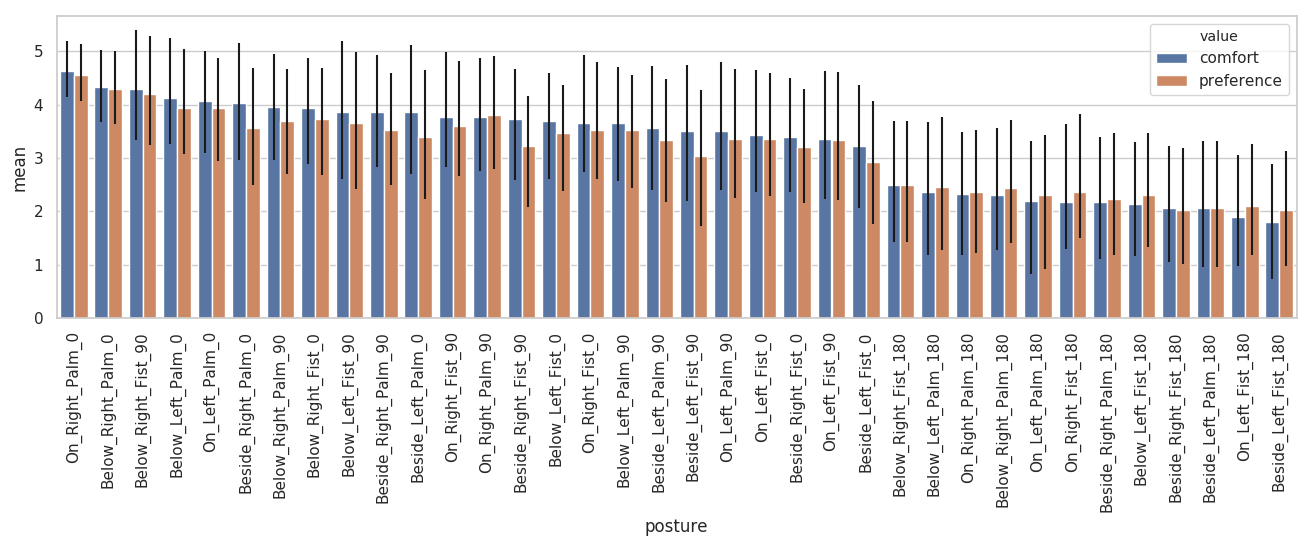

In [209]:
sns.set(style="whitegrid")
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
# plt.setp(ax.get_xticklabels(), rotation=90)
ax = sns.barplot(x="posture", y="mean", hue="value", data=all_postures_stats_melted, yerr=[all_postures_stats_melted["std"][:36],all_postures_stats_melted["std"][36:]],capsize=10)

In [220]:
postures_0 = all_postures_stats_melted.loc[all_postures_stats_melted["value"]== "comfort"][all_postures_stats_melted.posture.str.contains('_0')]
postures_90 = all_postures_stats_melted.loc[all_postures_stats_melted["value"]== "comfort"][all_postures_stats_melted.posture.str.contains('_90')]
postures_180 = all_postures_stats_melted.loc[all_postures_stats_melted["value"]== "comfort"][all_postures_stats_melted.posture.str.contains('_180')]
print(postures_0)
print(postures_90)
print(postures_180)

                        posture      mean       std variable    value
value                                                                
comfort 19      On_Right_Palm_0  4.633333  0.490133   rating  comfort
        7    Below_Right_Palm_0  4.333333  0.660895   rating  comfort
        6     Below_Left_Palm_0  4.133333  0.860366   rating  comfort
        18       On_Left_Palm_0  4.066667  0.980265   rating  comfort
        31  Beside_Right_Palm_0  4.033333  1.066200   rating  comfort
        1    Below_Right_Fist_0  3.933333  1.048261   rating  comfort
        30   Beside_Left_Palm_0  3.866667  1.166585   rating  comfort
        0     Below_Left_Fist_0  3.700000  1.087547   rating  comfort
        13      On_Right_Fist_0  3.666667  0.922266   rating  comfort
        12       On_Left_Fist_0  3.433333  1.072648   rating  comfort
        25  Beside_Right_Fist_0  3.400000  1.037238   rating  comfort
        24   Beside_Left_Fist_0  3.233333  1.165106   rating  comfort
                    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [222]:
postures_surface_on = all_postures_stats_melted.loc[all_postures_stats_melted["value"]== "comfort"][all_postures_stats_melted.posture.str.contains('On_')]
postures_surface_below = all_postures_stats_melted.loc[all_postures_stats_melted["value"]== "comfort"][all_postures_stats_melted.posture.str.contains('Below_')]
postures_surface_beside = all_postures_stats_melted.loc[all_postures_stats_melted["value"]== "comfort"][all_postures_stats_melted.posture.str.contains('Beside_')]
print(postures_surface_on)
print(postures_surface_below)
print(postures_surface_beside)

                      posture      mean       std variable    value
value                                                              
comfort 19    On_Right_Palm_0  4.633333  0.490133   rating  comfort
        18     On_Left_Palm_0  4.066667  0.980265   rating  comfort
        15   On_Right_Fist_90  3.766667  0.935261   rating  comfort
        21   On_Right_Palm_90  3.766667  1.006302   rating  comfort
        13    On_Right_Fist_0  3.666667  0.922266   rating  comfort
        20    On_Left_Palm_90  3.500000  1.106408   rating  comfort
        12     On_Left_Fist_0  3.433333  1.072648   rating  comfort
        14    On_Left_Fist_90  3.366667  1.129032   rating  comfort
        23  On_Right_Palm_180  2.333333  1.154701   rating  comfort
        22   On_Left_Palm_180  2.200000  1.374647   rating  comfort
        17  On_Right_Fist_180  2.166667  0.874281   rating  comfort
        16   On_Left_Fist_180  1.900000  0.922889   rating  comfort
                         posture      mean      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [223]:
postures_left_hand = all_postures_stats_melted.loc[all_postures_stats_melted["value"]== "comfort"][all_postures_stats_melted.posture.str.contains('_Left_')]
postures_right_hand = all_postures_stats_melted.loc[all_postures_stats_melted["value"]== "comfort"][all_postures_stats_melted.posture.str.contains('_Right_')]
print(postures_left_hand)
print(postures_right_hand)

                         posture      mean       std variable    value
value                                                                 
comfort 6      Below_Left_Palm_0  4.133333  0.860366   rating  comfort
        18        On_Left_Palm_0  4.066667  0.980265   rating  comfort
        2     Below_Left_Fist_90  3.866667  1.252125   rating  comfort
        30    Beside_Left_Palm_0  3.866667  1.166585   rating  comfort
        0      Below_Left_Fist_0  3.700000  1.087547   rating  comfort
        8     Below_Left_Palm_90  3.666667  1.093345   rating  comfort
        32   Beside_Left_Palm_90  3.566667  1.165106   rating  comfort
        26   Beside_Left_Fist_90  3.500000  1.306483   rating  comfort
        20       On_Left_Palm_90  3.500000  1.106408   rating  comfort
        12        On_Left_Fist_0  3.433333  1.072648   rating  comfort
        14       On_Left_Fist_90  3.366667  1.129032   rating  comfort
        24    Beside_Left_Fist_0  3.233333  1.165106   rating  comfort
      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [225]:
postures_open_form = all_postures_stats_melted.loc[all_postures_stats_melted["value"]== "comfort"][all_postures_stats_melted.posture.str.contains('_Palm_')]
postures_close_form = all_postures_stats_melted.loc[all_postures_stats_melted["value"]== "comfort"][all_postures_stats_melted.posture.str.contains('_Fist_')]
print(postures_open_form)
print(postures_close_form)

                          posture      mean       std variable    value
value                                                                  
comfort 19        On_Right_Palm_0  4.633333  0.490133   rating  comfort
        7      Below_Right_Palm_0  4.333333  0.660895   rating  comfort
        6       Below_Left_Palm_0  4.133333  0.860366   rating  comfort
        18         On_Left_Palm_0  4.066667  0.980265   rating  comfort
        31    Beside_Right_Palm_0  4.033333  1.066200   rating  comfort
        9     Below_Right_Palm_90  3.966667  0.999425   rating  comfort
        33   Beside_Right_Palm_90  3.866667  1.041661   rating  comfort
        30     Beside_Left_Palm_0  3.866667  1.166585   rating  comfort
        21       On_Right_Palm_90  3.766667  1.006302   rating  comfort
        8      Below_Left_Palm_90  3.666667  1.093345   rating  comfort
        32    Beside_Left_Palm_90  3.566667  1.165106   rating  comfort
        20        On_Left_Palm_90  3.500000  1.106408   rating  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


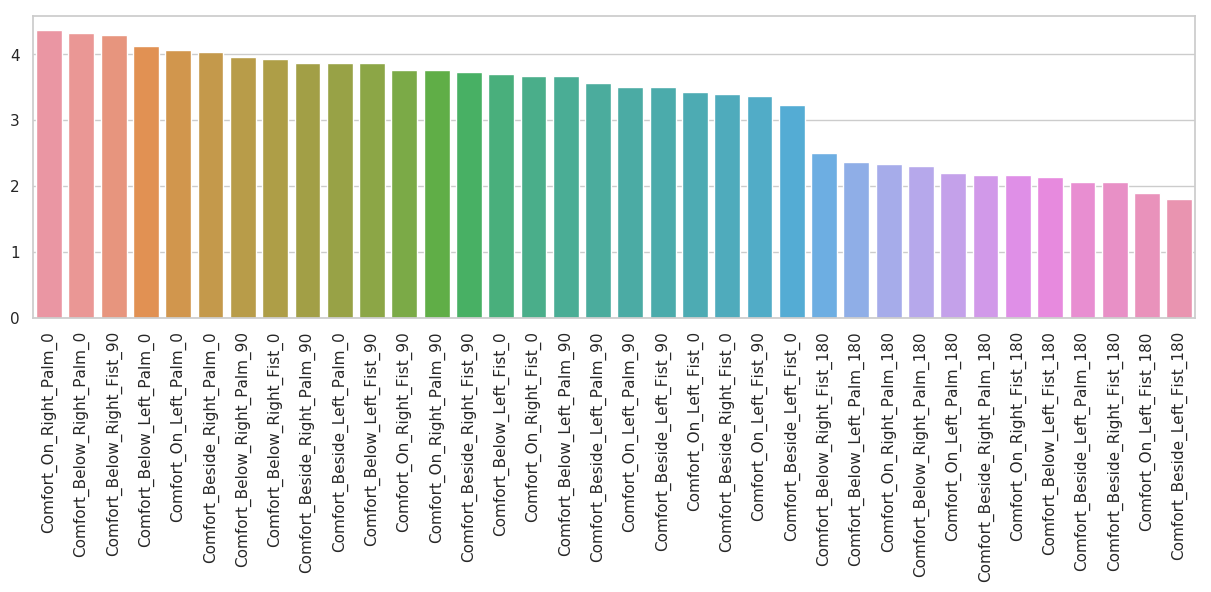

In [22]:
sns.set(style="whitegrid")
plt.figure(figsize=(15,4))
plt.xticks(rotation=90)
# plt.setp(ax.get_xticklabels(), rotation=90)
ax = sns.barplot(x=df_postures_comfort_mean.sort_values(ascending=False).index, y=df_postures_comfort_mean.sort_values(ascending=False).values)

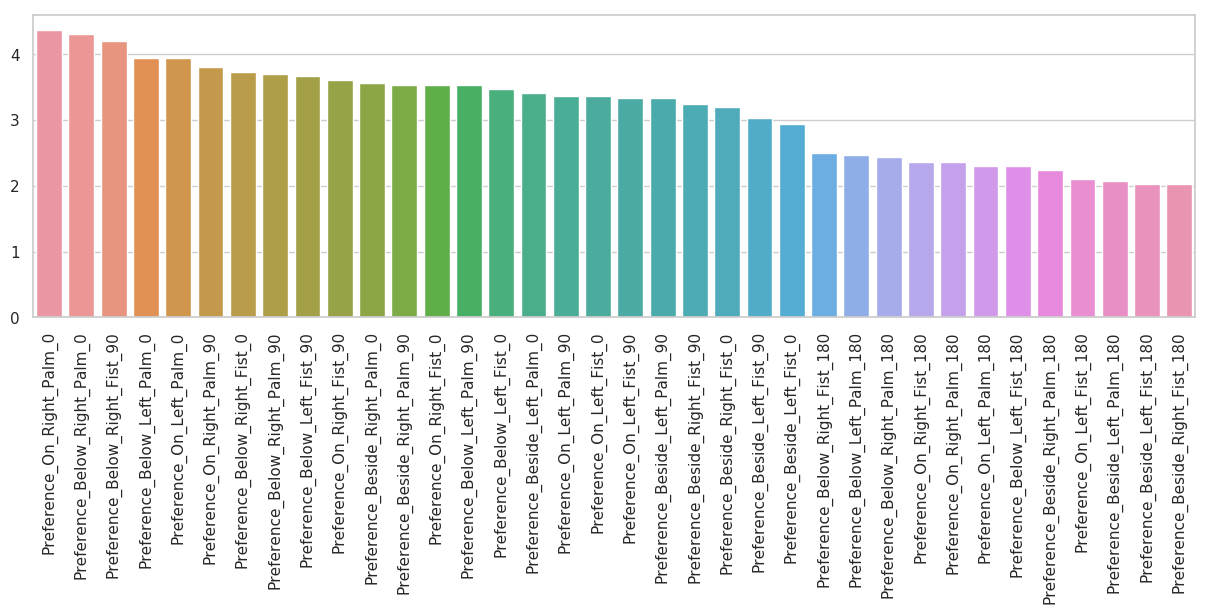

In [0]:
sns.set(style="whitegrid")
plt.figure(figsize=(15,4))
plt.xticks(rotation=90)
# plt.setp(ax.get_xticklabels(), rotation=90)
ax = sns.barplot(x=df_postures_preference_mean.sort_values(ascending=False).index, y=df_postures_preference_mean.sort_values(ascending=False).values)


**To do**

- Compare postures across different dimensions (SURFACE, WRIST_ORIENTATION, HAND_FORM & DEXTERITY)
- Give design recomendations based on above^^

In [0]:
df_postures_comfort_stats.sort_values(by = "mean", ascending=False)

,posture,mean,std
19,Comfort_On_Right_Palm_0,4.366667,0.999425
7,Comfort_Below_Right_Palm_0,4.333333,0.660895
3,Comfort_Below_Right_Fist_90,4.300000,0.952311
6,Comfort_Below_Left_Palm_0,4.133333,0.860366
18,Comfort_On_Left_Palm_0,4.066667,0.980265
31,Comfort_Beside_Right_Palm_0,4.033333,1.066200
9,Comfort_Below_Right_Palm_90,3.966667,0.999425
1,Comfort_Below_Right_Fist_0,3.933333,1.048261
2,Comfort_Below_Left_Fist_90,3.866667,1.252125
33,Comfort_Beside_Right_Palm_90,3.866667,1.041661


In [0]:
df = pd.DataFrame({'Name': {0: 'John', 1: 'Bob', 2: 'Shiela'}, 
                   'Course': {0: 'Masters', 1: 'Graduate', 2: 'Graduate'}, 
                   'Age': {0: 27, 1: 23, 2: 21}}) 
df

,Name,Course,Age
0,John,Masters,27
1,Bob,Graduate,23
2,Shiela,Graduate,21


In [0]:
pd.melt(df, id_vars =['Name'], value_vars =['Course'])
# pd.melt(df, id_vars =['Name'])


,Name,variable,value
0,John,Course,Masters
1,Bob,Course,Graduate
2,Shiela,Course,Graduate
